Content
Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

Predict insurance costs

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [43]:
insurance=pd.read_csv("insurance.csv")

In [44]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [45]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
insurance[insurance["sex"]=="female"][insurance["smoker"]=="yes"].describe()

C:\Users\acer\AppData\Local\Temp\ipykernel_15748\2240996993.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  insurance[insurance["sex"]=="female"][insurance["smoker"]=="yes"].describe()


,age,bmi,children,charges
count,115.000000,115.000000,115.000000,115.000000
mean,38.608696,29.608261,1.008696,30678.996276
std,14.217419,6.663802,1.135516,11907.536381
min,18.000000,17.195000,0.000000,13844.506000
25%,26.500000,24.650000,0.000000,19696.432100
50%,39.000000,28.380000,1.000000,28950.469200
75%,48.500000,34.352500,2.000000,40918.314500
max,64.000000,47.600000,5.000000,63770.428010


In [47]:
insurance[insurance["sex"]=="male"].describe()

,age,bmi,children,charges
count,676.000000,676.000000,676.000000,676.000000
mean,38.917160,30.943129,1.115385,13956.751178
std,14.050141,6.140435,1.218986,12971.025915
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.410000,0.000000,4619.134000
50%,39.000000,30.687500,1.000000,9369.615750
75%,51.000000,34.992500,2.000000,18989.590250
max,64.000000,53.130000,5.000000,62592.873090


In [48]:
insurance["sex"].replace({"female":1,"male":0}, inplace=True)

In [49]:
insurance["smoker"].replace({"yes":1,"no":0}, inplace=True)

In [50]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [51]:
numeric_columns=["age","bmi","children","charges"]

In [52]:
insurance["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

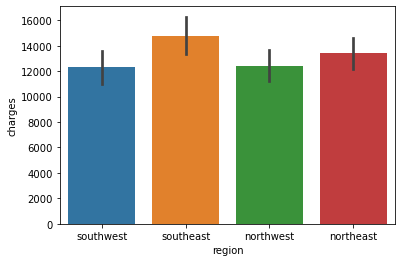

In [53]:
sns.barplot(x="region",y="charges", data=insurance); 

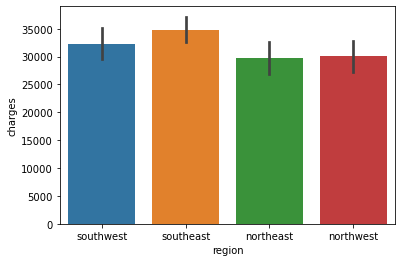

In [54]:
sns.barplot(x="region",y="charges", data=insurance[insurance["smoker"]==1]);

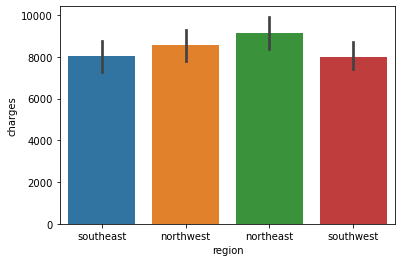

In [55]:
sns.barplot(x="region",y="charges", data=insurance[insurance["smoker"]==0]);

c:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

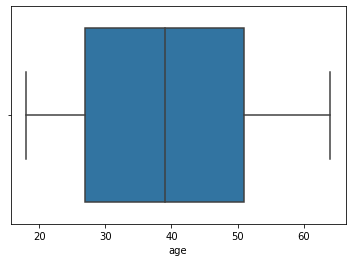

In [56]:
sns.boxplot(insurance["age"])

c:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

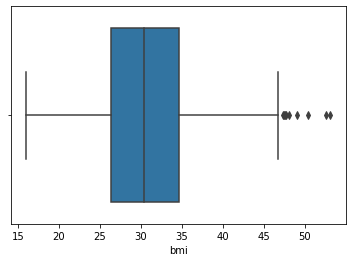

In [57]:
sns.boxplot(insurance["bmi"])

c:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


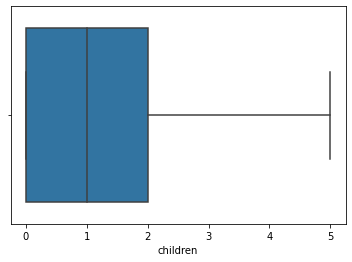

In [58]:
sns.boxplot(insurance[numeric_columns[2]]);

c:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


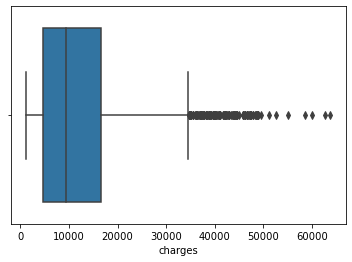

In [59]:
sns.boxplot(insurance[numeric_columns[3]]);

In [60]:
insurance.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,southwest,16884.9240
1,18,0,33.77,1,0,southeast,1725.5523


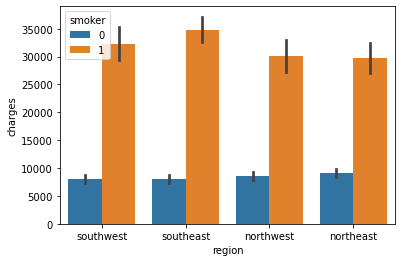

In [61]:
sns.barplot(x="region",y="charges", hue="smoker", data=insurance);

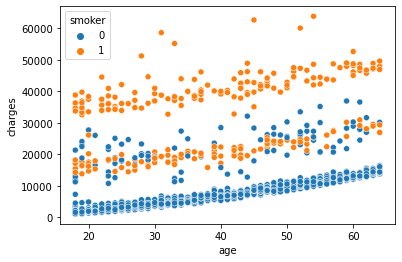

In [62]:
sns.scatterplot(x="age",y="charges",hue="smoker", data=insurance);

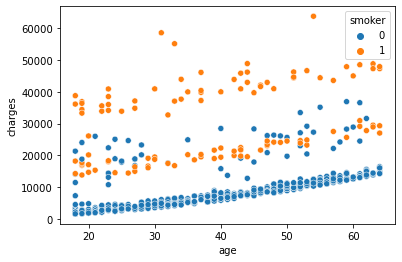

In [63]:
sns.scatterplot(x="age",y="charges",hue="smoker", data=insurance[insurance["sex"]==1]);

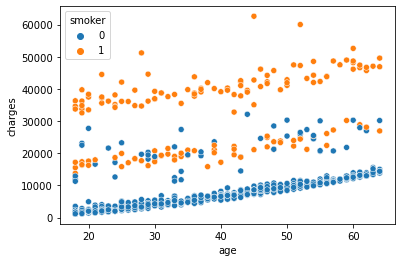

In [64]:
sns.scatterplot(x="age",y="charges",hue="smoker", data=insurance[insurance["sex"]==0]);

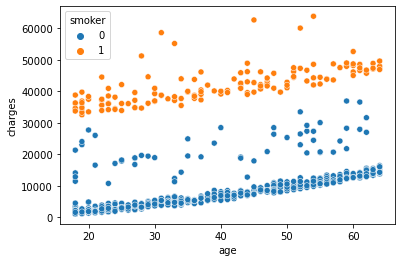

In [65]:
sns.scatterplot(x="age",y="charges",hue="smoker", data=insurance[insurance["bmi"]>30]);

In [66]:
insurance.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [67]:
insurance[insurance["charges"]>50000]

,age,sex,bmi,children,smoker,region,charges
34,28,0,36.400,1,1,southwest,51194.55914
543,54,1,47.410,0,1,southeast,63770.42801
577,31,1,38.095,1,1,northeast,58571.07448
819,33,1,35.530,0,1,northwest,55135.40209
1146,60,0,32.800,0,1,southwest,52590.82939
1230,52,0,34.485,3,1,northwest,60021.39897
1300,45,0,30.360,0,1,southeast,62592.87309


c:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

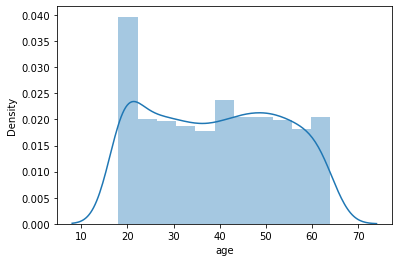

In [69]:
sns.distplot(insurance["age"])

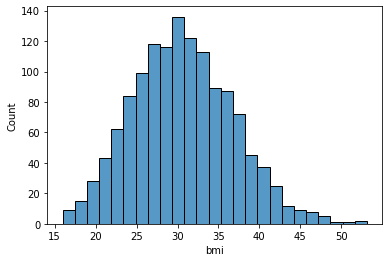

In [72]:
sns.histplot(insurance["bmi"]);